<a href="https://colab.research.google.com/github/romo05/vehicle-price-predictor/blob/main/Vehicle_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Inspection

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Vehicle_Price_Prediction/dataset.csv')

df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [ ]:
# Check data types and non null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [ ]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [ ]:
# Check for null values
df.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


Data Cleaning


In [ ]:
# Working with a copy
df = df.copy()

# Remove duplicate rows
df = df.drop_duplicates()

# Drop columns with too many null values
missing_percent = df.isnull().mean()
drop_cols = missing_percent[missing_percent>0.5].index #columns accessed as col_name[col_value]
df.drop(drop_cols, axis=1, inplace=True)

# Imputing missing rows (categorical:mode | numerical:median)
for col in df.columns:
  if df[col].isnull().sum() > 0:
    if df[col].dtype == 'object':
      df[col] = df[col].fillna(df[col].mode()[0])
    else:
      df[col] = df[col].fillna(df[col].median())

# Dropping description and name columns
df.drop(['name', 'description'], axis=1, errors='ignore', inplace=True)

Cleaning 'transmission' column


In [ ]:
df['transmission'] = df['transmission'].str.lower()

def simplify_transmission(value):
    if 'cvt' in value:
        return 'CVT'
    elif 'dual clutch' in value or 'dct' in value:
        return 'Dual Clutch'
    elif 'dsg' in value:
        return 'DSG'
    elif 'manual' in value:
        return 'Manual'
    elif '1-speed' in value or '1 speed' in value:
        return '1-Speed Automatic'
    elif '2-speed' in value or '2 speed' in value:
        return '2-Speed Automatic'
    elif '10-speed' in value or '10 speed' in value:
        return '10-Speed Automatic'
    elif '9-speed' in value or '9 speed' in value:
        return '9-Speed Automatic'
    elif '8-speed' in value or '8 speed' in value:
        return '8-Speed Automatic'
    elif '7-speed' in value or '7 speed' in value:
        return '7-Speed Automatic'
    elif '6-speed' in value or '6 speed' in value:
        return '6-Speed Automatic'
    elif '5-speed' in value or '5 speed' in value:
        return '5-Speed Automatic'
    elif 'automatic' in value or 'a/t' in value:
        return 'Automatic'
    else:
        return 'Other'

In [ ]:
df['transmission'] = df['transmission'].apply(simplify_transmission)

Cleaning Fuel column

In [ ]:
fuel_mapping = {
    'Gasoline': 'Gasoline',
    'Petrol': 'Gasoline',
    'Diesel': 'Diesel',
    'Diesel (B20 capable)': 'Diesel',
    'Hybrid': 'Hybrid',
    'PHEV Hybrid Fuel': 'Hybrid',
    'Electric': 'Electric',
    'E85 Flex Fuel': 'Other',
    'Other': 'Other'
}

df['fuel_cleaned'] = df['fuel'].map(fuel_mapping).fillna('Other')

# Exploratory Data Analysis

Plotting different labels to price to understand how each of them influence price

Quick Price Overview

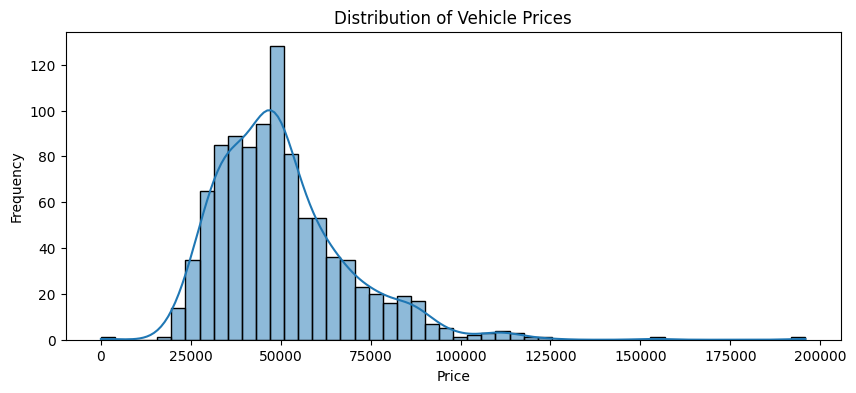

np.float64(1.5026493513997716)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.histplot(df['price'], bins=50, kde=True) # Seaborn used to combine histogram with kernal density estimate(KDE)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

df['price'].skew()

Observations:

1.   Plot is right skewed
2.   There are extreme outliers at around 50k



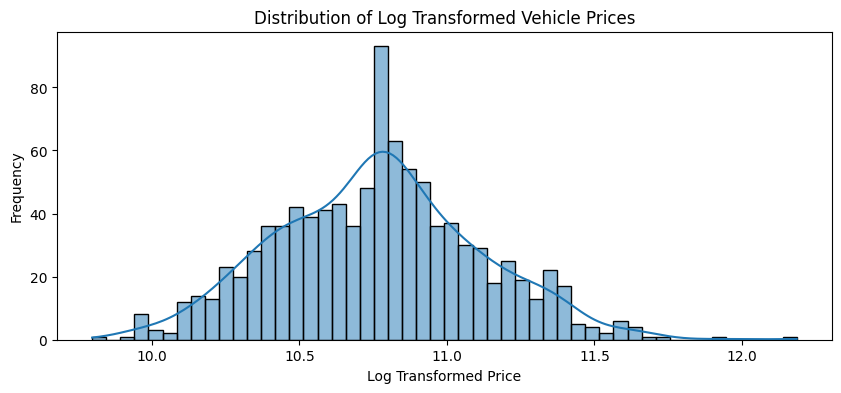

In [ ]:
import numpy as np

df = df[df['price']>0].copy()
df['log_price'] = np.log(df['price'])

plt.figure(figsize=(10,4))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Distribution of Log Transformed Vehicle Prices')
plt.xlabel('Log Transformed Price')
plt.ylabel('Frequency')
plt.show()

Relationship between price and mileage

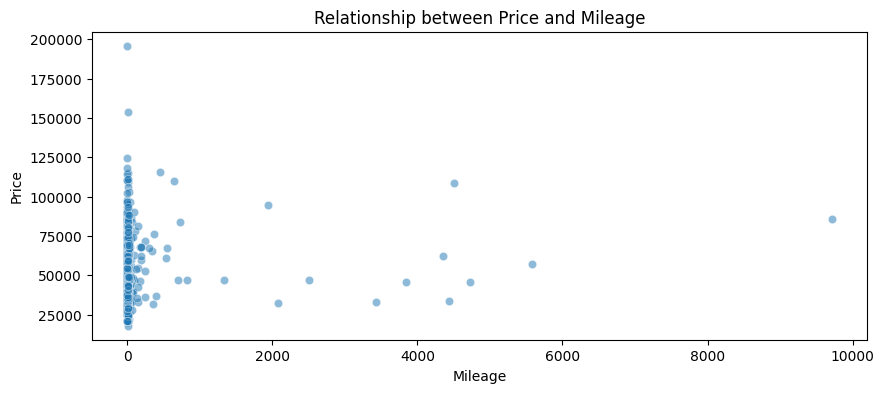

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.5)
plt.title('Relationship between Price and Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Imputing missing and wrong mileage values

In [ ]:
df.loc[(df['mileage'] <= 0) | (df['mileage'] > 70), 'mileage'] = None

# Creating a flag column to check if electric or not
df['is_electric'] = (df['fuel'] == 'Electric').astype(int)

# Setting mileage of electric vehicles to a default value
df.loc[df['fuel'] == 'Electric', 'mileage'] = df['mileage'].mean()

# Filling mileage in empty columns with average per fuel type
df['mileage'] = df.groupby('fuel')['mileage'].transform(lambda x: x.fillna(x.mean()))

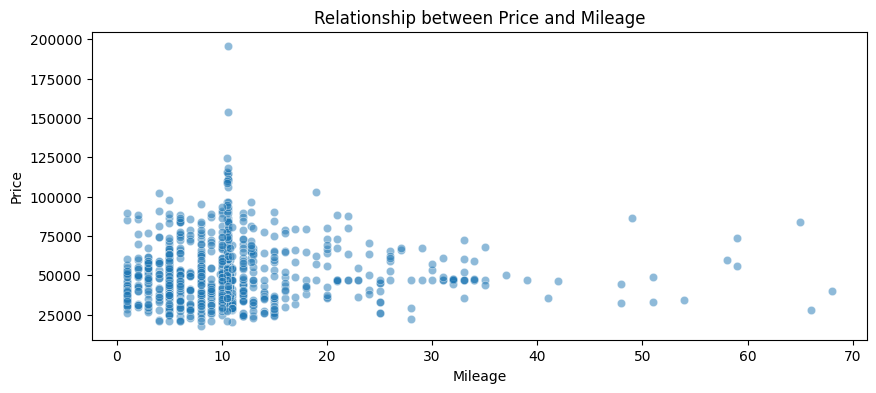

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.5)
plt.title('Relationship between Price and Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Price by Year

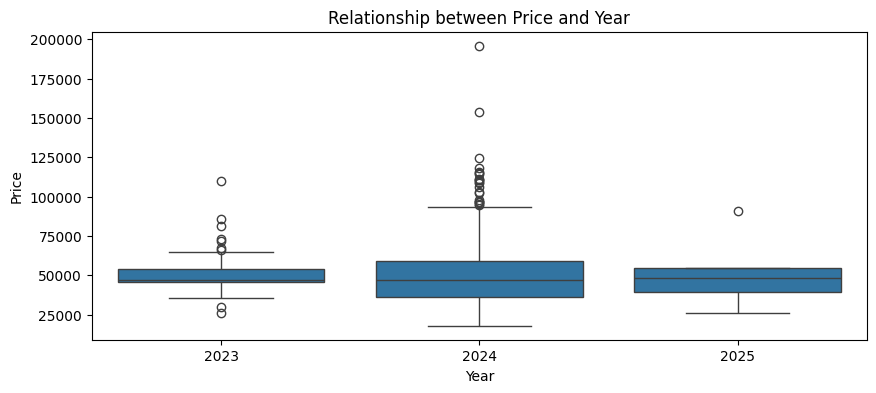

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='year', y='price', data=df)
plt.title('Relationship between Price and Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Price by Make

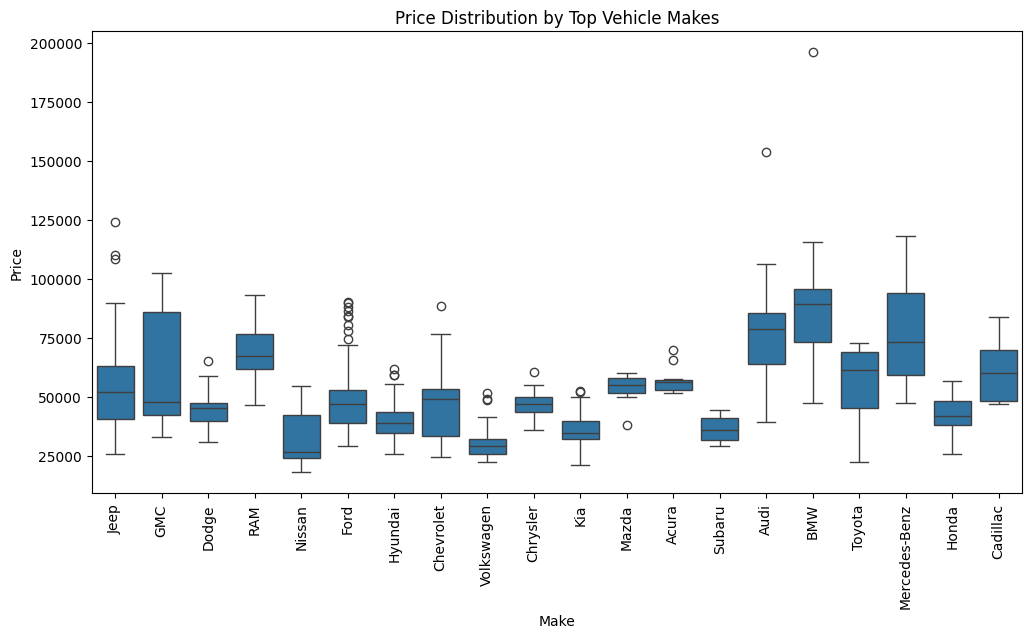

In [ ]:
top_makes = df['make'].value_counts().head(20).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='price', data=df[df['make'].isin(top_makes)])
plt.xticks(rotation=90)
plt.title('Price Distribution by Top Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

# Preprocessing and Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['log_price', 'price'], axis=1) # Features (input columns)
y = df['log_price'] # Target (output to be predicted)

# One hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

#Scale numerical columns (for Linear Regression)
num_cols = ['year', 'cylinders', 'mileage', 'doors']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training and Evaluation**

## Linear Regression

Function to computer MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  nonzero_idx = y_true != 0
  return np.mean(np.abs((y_true[nonzero_idx]- y_pred[nonzero_idx])/y_true[nonzero_idx]))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate Performance
print("Linear Regression Performance")
print('R² score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred))

Linear Regression Performance
R² score:  0.7856391247191228
MAE:  0.09819900599666409
RMSE:  0.022935002321085772


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Performance
print("Random Forest Performance")
print('R² score: ', r2_score(y_test, y_pred_rf))
print('MAE: ', mean_absolute_percentage_error(y_test, y_pred_rf))
print('RMSE: ', mean_squared_error(y_test, y_pred_rf))

Random Forest Performance
R² score:  0.8672779540605118
MAE:  0.007792366417827064
RMSE:  0.014200261254265196


## XGBoost Regressor

In [ ]:
# Replace brackets and angle brackets with underscores or remove them
X_train.columns = X_train.columns.str.replace('[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[\[\]<>]', '', regex=True)

In [ ]:
import xgboost as xgb

# Create the model
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 6,
    random_state = 42,
    n_jobs = 1
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
print("XGBoost Performance")
print('R² score: ', r2_score(y_test, y_pred_xgb))
print('MAE: ', mean_absolute_percentage_error(y_test, y_pred_xgb))
print('RMSE: ', mean_squared_error(y_test, y_pred_xgb))

XGBoost Performance
R² score:  0.870997864640665
MAE:  0.007752409967392749
RMSE:  0.013802258784466283


XG Boost is having highest R² values and better MAE and RMSE

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define a search space
param_grid = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.1, 0.05],
    'max_depth' : [3, 6, 10],
    'subsample' : [0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)

# Setup grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    error_score='raise',
    cv=3,
    n_jobs=1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print('Best parameters: ', grid_search.best_params_)
print('Best RMSE: ', -grid_search.best_score_) # Negative sign to negate the negative RMSE

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE:  0.14519878075814904


## Train final model with best parameters

In [ ]:
import xgboost as xgb

# Create the model
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 6,
    random_state = 42,
    subsample = 0.8,
    n_jobs = 1
)

# Train the model
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_log_error, r2_score

print("XGBoost Performance")

# Log scale
print("\nLog Scale")
print('R² score: ', r2_score(y_test, y_pred_xgb))
print('MAE: ', mean_absolute_error(y_test, y_pred_xgb))
print('MSE: ', mean_squared_error(y_test, y_pred_xgb))

# Original Scale

# Converting log form to original form
y_test_og = np.exp(y_test)
y_pred_og = np.exp(y_pred)

print("\nOriginal Scale")
print('R² score: ', r2_score(y_test_og, y_pred_og))
print('MAPE: ', mean_absolute_percentage_error(y_test_og, y_pred_og))
print('MSLE: ', mean_squared_log_error(y_test_og, y_pred_og))

XGBoost Performance

Log Scale
R² score:  0.8747522621952508
MAE:  0.08300382292204862
MSE:  0.013400566467638977

Original Scale
R² score:  0.5713090941606342
MAPE:  0.10282376363792675
MSLE:  0.022934137574700815


Feature Importance

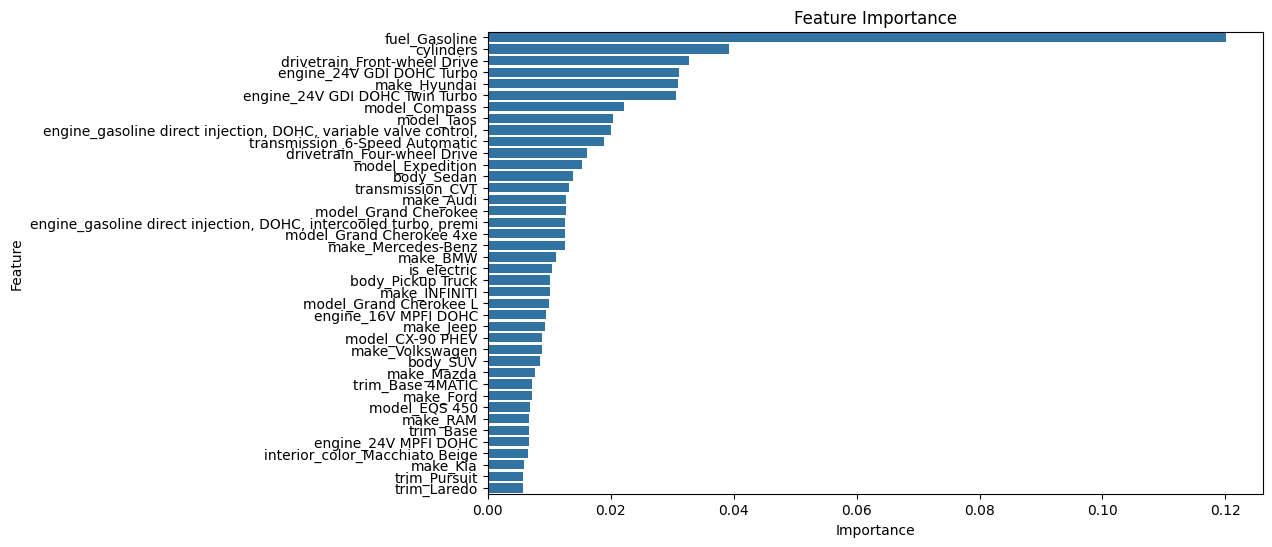

In [ ]:
best_xgb = grid_search.best_estimator_

# Get feature importances
importances = best_xgb.feature_importances_
features = X_train.columns

# Dataframe for plotting
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(40)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Save the trained model

In [ ]:
xgb_model.save_model('xgob_price_prediction_model.json')

Save model columns

In [ ]:
import joblib
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']

Exporting to Google Drive

In [ ]:
import shutil

shutil.copy('xgob_price_prediction_model.json', '/content/drive/MyDrive/Vehicle_Price_Prediction/')
shutil.copy('model_columns.pkl', '/content/drive/MyDrive/Vehicle_Price_Prediction/')

'/content/drive/MyDrive/Vehicle_Price_Prediction/model_columns.pkl'